# 1. Imports

In [1]:
# !wget https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux_NoVis.zip .
# !unzip Tennis_Linux_NoVis.zip

In [2]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import seaborn as sns
import pandas as pd

from unityagents import UnityEnvironment

from trainer import trainer
from ddpg_agent import Agent as DDPGAgent

import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# 2. Environment

In [3]:
env = UnityEnvironment(file_name='Tennis_Linux_NoVis/Tennis.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

print('Number of agents:', len(env_info.agents))
print('Number of actions:', action_size)
print('States look like:', states[0])
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Number of actions: 2
States look like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
States have length: 24


# 3. Solution

The environment is solved with the following hyperparameters:

```
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-5         # learning rate of the actor 
LR_CRITIC = 3e-5        # learning rate of the critic
WEIGHT_DECAY = 0.0001   # L2 weight decay
```

In [4]:
start_time = time.time()
agents = [DDPGAgent(state_size=state_size, action_size=action_size, random_seed=42), DDPGAgent(state_size=state_size, action_size=action_size, random_seed=24)]
scores, episodes = trainer(agents, env, brain_name, max_t=100000, n_episodes=100000, n_random_episodes=400, score_solved=0.5, model_filename='solution.pth')
elapsed_time = round(time.time() - start_time, 2)
print("\nElapsed time: ", elapsed_time)
scores_df = pd.DataFrame(scores, columns=['score'])
scores_df.to_csv('scores.csv', index=False)

Episode 26	Average Score: 0.03

/home/brothernico/.local/share/virtualenvs/drlnd_p2_continuous-mP_XCw9X/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.02
Episode 200	Average Score: 0.03
Episode 300	Average Score: 0.02
Episode 400	Average Score: 0.03
Episode 500	Average Score: 0.02
Episode 600	Average Score: 0.03
Episode 700	Average Score: 0.08
Episode 800	Average Score: 0.10
Episode 900	Average Score: 0.13
Episode 1000	Average Score: 0.18
Episode 1100	Average Score: 0.42
Episode 1200	Average Score: 0.40
Episode 1300	Average Score: 0.41
Episode 1400	Average Score: 0.31
Episode 1477	Average Score: 0.50
Environment solved in 1477 episodes!	Average Score: 0.50

Elapsed time:  2924.03


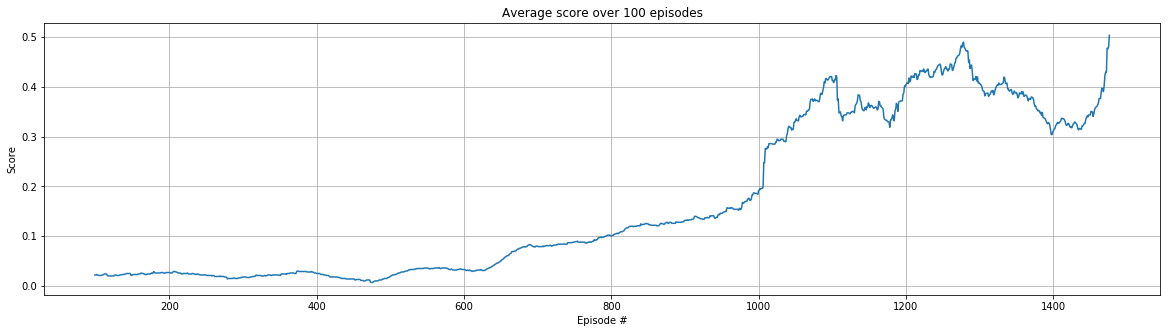

In [8]:
scores = pd.read_csv('scores.csv')
plt.figure(figsize=(20,5))
plt.plot(range(len(scores)), scores.rolling(100).mean())
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Average score over 100 episodes")
plt.grid()
plt.show()